In [24]:
import os
from collections import Counter
import cv2
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import collections

Check Count of Raw Data (9/0.5/0.5 Ratio)

In [25]:
folders = ["train", "valid", "test"]

for folder in folders:
    img_path = f"raw_data/{folder}/images"
    label_path = f"raw_data/{folder}/labels"
    print(f"{folder}: {len(os.listdir(img_path))} images, {len(os.listdir(label_path))} labels")

train: 3405 images, 3405 labels
valid: 161 images, 161 labels
test: 158 images, 158 labels


Check Count of every Labels (Labels encoded to digit)

In [26]:
all_labels = []
for folder in folders:
    label_path = f"raw_data/{folder}/labels"
    for file in os.listdir(label_path):
        with open(os.path.join(label_path, file), "r") as txt:
            for line in txt:
                class_id = line.split()[0]
                all_labels.append(int(class_id))

counter = Counter(all_labels)
print("Class distribution:", counter)

Class distribution: Counter({5: 1343, 8: 1074, 3: 1038, 1: 936, 4: 851, 7: 817, 2: 667, 6: 609, 0: 597})


Split New Data into 8/1/1 from Raw Data

In [27]:
base_dir = "raw_data"
split = ["train", "valid", "test"]

all_images = []
all_labels = []
classes = []

for folder in split:
    img_dir = os.path.join(base_dir, folder, "images")
    label_dir = os.path.join(base_dir, folder, "labels")

    if not os.path.exists(label_dir):
        print(f"Warning: Directory {label_dir} does not exist. Skipping.")
        continue

    for lf in os.listdir(label_dir):
        if lf.endswith(".txt"):
            img_name = lf.replace(".txt", ".jpg")
            img_path = os.path.join(img_dir, img_name)
            label_path = os.path.join(label_dir, lf)

            if os.path.exists(img_path) and os.path.exists(label_path):
                all_images.append(img_path)
                all_labels.append(label_path)
                
                # Get the class ID from the first line of the label file
                try:
                    with open(label_path) as f:
                        line = f.readline().strip()
                        if line:
                            class_id = int(line.split()[0])
                        else:
                            class_id = -1 # Empty file
                        classes.append(class_id)
                except (IOError, ValueError):
                    print(f"Error reading or parsing file: {label_path}. Assigning class -1.")
                    classes.append(-1)

if not all_images:
    print("No image or label files found!!!")
else:
    train_imgs, temp_imgs, train_labels, temp_labels = train_test_split(
        all_images, all_labels, test_size=0.2, stratify=classes, random_state=42
    )

    image_to_class_map = {img_path: class_id for img_path, class_id in zip(all_images, classes)}
    temp_classes = [image_to_class_map[img] for img in temp_imgs]

    val_imgs, test_imgs, val_labels, test_labels = train_test_split(
        temp_imgs, temp_labels, test_size=0.5, stratify=temp_classes, random_state=42
    )

    new_base_dir = "split_data"
    for split in ["train", "valid", "test"]:
        os.makedirs(os.path.join(new_base_dir, split, "images"), exist_ok=True)
        os.makedirs(os.path.join(new_base_dir, split, "labels"), exist_ok=True)

    def copy_files(img_list, label_list, split):
        for img, label in zip(img_list, label_list):
            try:
                shutil.copy(img, os.path.join(new_base_dir, split, "images", os.path.basename(img)))
                shutil.copy(label, os.path.join(new_base_dir, split, "labels", os.path.basename(label)))
            except FileNotFoundError as e:
                print(f"Error copying file: {e}")

    copy_files(train_imgs, train_labels, "train")
    copy_files(val_imgs, val_labels, "valid")
    copy_files(test_imgs, test_labels, "test")

    print(f"Successfully resplit dataset into 8/1/1!!!")

Successfully resplit dataset into 8/1/1!!!


In [56]:
labels = ['Apple', 'Banana', 'Grapes', 'Kiwi', 'Mango', 'Orange', 'Pineapple', 'Sugerapple', 'Watermelon']
label_map = {i: labels[i] for i in range(len(labels))}

data_counts = {
    'train': collections.defaultdict(int),
    'valid': collections.defaultdict(int),
    'test': collections.defaultdict(int)
}

splits = ['train', 'valid', 'test']
base_dir = "split_data"

for split in splits:
    label_dir = os.path.join(base_dir, split, 'labels')
    if os.path.exists(label_dir):
        for label_file in os.listdir(label_dir):
            if label_file.endswith('.txt'):
                label_path = os.path.join(label_dir, label_file)
                try:
                    with open(label_path, 'r') as f:
                        lines = f.readlines()
                        if lines:
                            first_line = lines[0].strip()
                            if first_line:
                                class_id = int(first_line.split()[0])
                                data_counts[split][class_id] += 1
                except (IOError, ValueError) as e:
                    print(f"Error processing file {label_path}: {e}")

final_counts = {}
for split in splits:
    final_counts[split] = {}
    for class_id, count in data_counts[split].items():
        label_name = label_map.get(class_id, f"Unknown (ID: {class_id})")
        final_counts[split][label_name] = count

print("File counts for each label in train, valid, and test sets:")
for split in splits:
    print(f"\n--- {split.upper()} ---")
    if final_counts[split]:
        for label, count in sorted(final_counts[split].items()):
            print(f"{label}: {count} files")
    else:
        print("No data found.")

File counts for each label in train, valid, and test sets:

--- TRAIN ---
Apple: 343 files
Banana: 333 files
Grapes: 395 files
Kiwi: 312 files
Mango: 270 files
Orange: 369 files
Pineapple: 286 files
Sugerapple: 281 files
Watermelon: 349 files

--- VALID ---
Apple: 43 files
Banana: 42 files
Grapes: 49 files
Kiwi: 39 files
Mango: 34 files
Orange: 46 files
Pineapple: 35 files
Sugerapple: 35 files
Watermelon: 44 files

--- TEST ---
Apple: 43 files
Banana: 42 files
Grapes: 50 files
Kiwi: 39 files
Mango: 33 files
Orange: 46 files
Pineapple: 36 files
Sugerapple: 35 files
Watermelon: 44 files


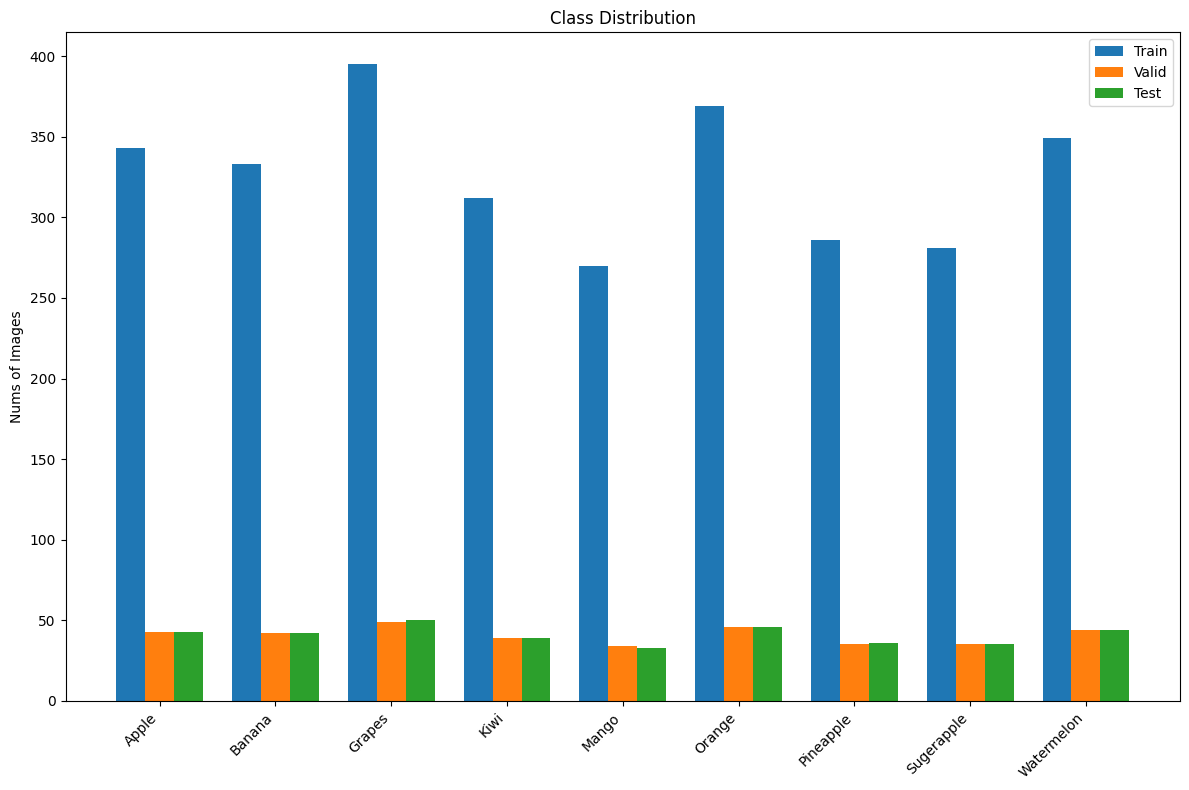

In [39]:
import pandas as pd
import numpy as np
df_counts = pd.DataFrame(final_counts).fillna(0).astype(int)

# Sort the index alphabetically for consistent plotting
df_counts = df_counts.reindex(sorted(df_counts.index))

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.25

x = np.arange(len(df_counts.index))

ax.bar(x - width, df_counts['train'], width, label='Train')
ax.bar(x, df_counts['valid'], width, label='Valid')
ax.bar(x + width, df_counts['test'], width, label='Test')

ax.set_ylabel("Nums of Images")
ax.set_title("Class Distribution")
ax.set_xticks(x)
ax.set_xticklabels(df_counts.index, rotation=45, ha="right")
ax.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig('label_distribution_bar_chart.png')

In [ ]:
import numpy as np

label_folder = "raw_data/test/labels"
label_files = [f for f in os.listdir(label_folder) if f.endswith(".txt")]

def polygon_to_bbox(coords, img_w, img_h):
    # coords là list: [x1,y1,x2,y2,...]
    coords = np.array(coords).reshape(-1,2)
    coords[:,0] *= img_w
    coords[:,1] *= img_h
    x_min = int(coords[:,0].min())
    y_min = int(coords[:,1].min())
    x_max = int(coords[:,0].max())
    y_max = int(coords[:,1].max())
    return x_min, y_min, x_max, y_max

for lf in label_files:
    label_path = os.path.join(label_folder, lf)
    with open(label_path) as f:
        for line in f:
            parts = list(map(float, line.strip().split()))


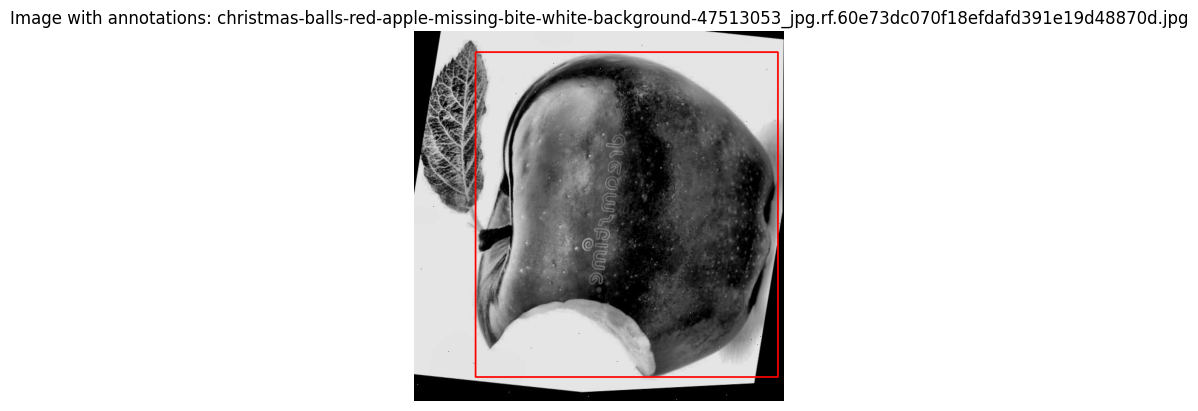

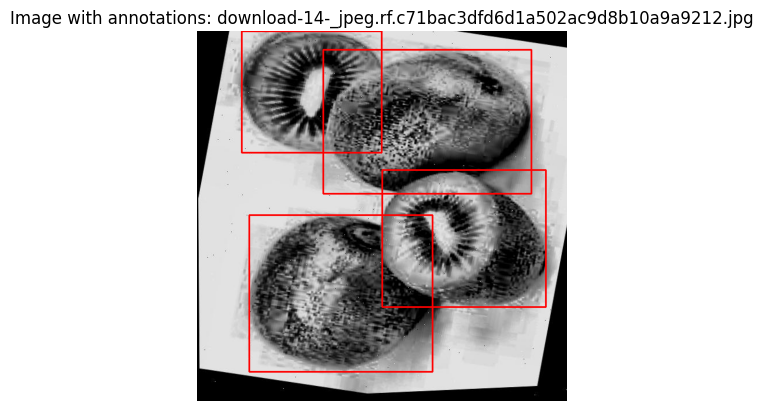

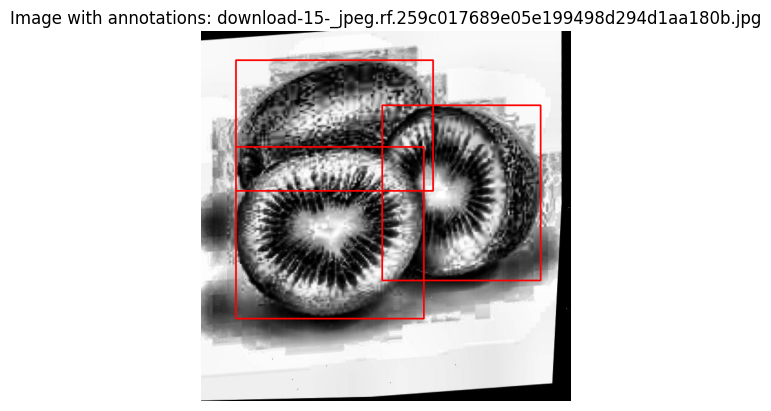

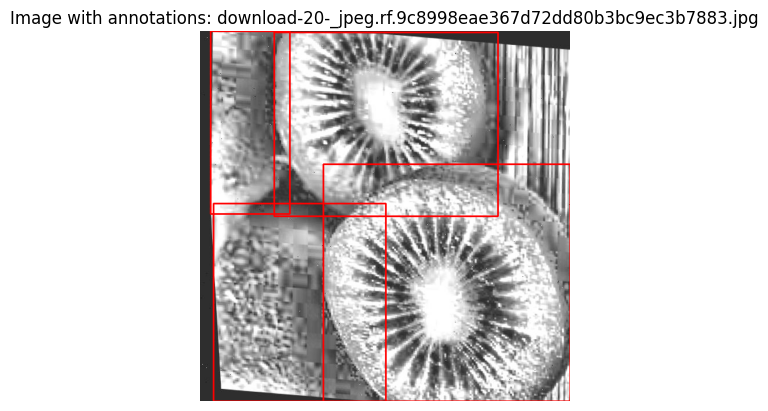

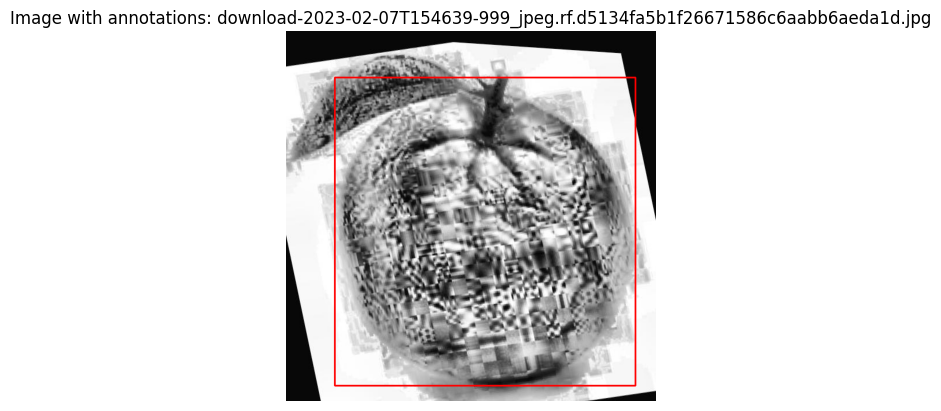

In [37]:
def polygon_to_bbox(polygon, w, h):
    # Your implementation of polygon_to_bbox
    # Example for YOLO format:
    # polygon is a flat list of normalized points: [x1, y1, x2, y2, ...]
    # For a single object, parts[1:] might be [center_x, center_y, width, height]
    # For a polygon, it might be a list of x,y coordinates
    # This example assumes a bounding box format: [center_x, center_y, width, height]
    # To handle polygon format, you would need to calculate the min/max x and y
    
    if len(polygon) == 4: # Assuming YOLO format [cx, cy, w, h]
        cx, cy, bw, bh = polygon
        x_min = int((cx - bw / 2) * w)
        y_min = int((cy - bh / 2) * h)
        x_max = int((cx + bw / 2) * w)
        y_max = int((cy + bh / 2) * h)
    else: 
        x_coords = [polygon[i] for i in range(0, len(polygon), 2)]
        y_coords = [polygon[i] for i in range(1, len(polygon), 2)]
        x_min = int(min(x_coords) * w)
        y_min = int(min(y_coords) * h)
        x_max = int(max(x_coords) * w)
        y_max = int(max(y_coords) * h)
        
    return x_min, y_min, x_max, y_max

image_folder = "split_data/valid/images"
label_folder = "split_data/valid/labels"

if not os.path.exists(label_folder):
    print(f"Error: Label folder not found at {label_folder}")
else:
    label_files = [f for f in os.listdir(label_folder) if f.endswith('.txt')]

    for lf in label_files[:5]:
        label_path = os.path.join(label_folder, lf)
        
        # Check for multiple image extensions
        file_base_name = os.path.splitext(lf)[0]
        img_found = False
        
        for ext in ['.jpg', '.jpeg', '.png']:
            img_path = os.path.join(image_folder, file_base_name + ext)
            if os.path.exists(img_path):
                img_found = True
                break
        
        if not img_found:
            print(f"Not Found Image: {lf}")
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Error when loading image {img_path}")
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape
        
        with open(label_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                if len(parts) < 3:
                    continue
                class_id = int(parts[0])
                polygon = parts[1:]
                
                # Check for the minimum number of coordinates for a valid polygon (at least 2 points)
                if len(polygon) % 2 != 0 or len(polygon) < 4:
                    continue # Skip invalid lines
                
                x1, y1, x2, y2 = polygon_to_bbox(polygon, w, h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Image with annotations: {os.path.basename(img_path)}")
        plt.show()